In [117]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
from glob import glob

adir_data = 'F:/data/cruise_data/saildrone/sss/sss_collocations_norepeat/'
saildrone_filenames_rss = glob(adir_data+'*atomic*rss*.nc')

saildrone_filenames_jpl = glob(adir_data+'*atomic*jpl*.nc')

plt.rcParams['figure.figsize'] = (10.0, 8.0)

In [118]:
saildrone_filenames_jpl

['F:/data/cruise_data/saildrone/sss/sss_collocations_norepeat\\saildrone-gen_5-atomic_eurec4a_2020-sd1026-20200117T000000-20200302T235959-1_minutes-v1.1589306725934jplv04.3_filesave4norep.nc',
 'F:/data/cruise_data/saildrone/sss/sss_collocations_norepeat\\saildrone-gen_5-atomic_eurec4a_2020-sd1060-20200117T000000-20200302T235959-1_minutes-v1.1589306886594jplv04.3_filesave4norep.nc',
 'F:/data/cruise_data/saildrone/sss/sss_collocations_norepeat\\saildrone-gen_5-atomic_eurec4a_2020-sd1061-20200117T000000-20200302T235959-1_minutes-v1.1589307121602jplv04.3_filesave4norep.nc']

In [139]:
ds=[]
for iusv in range(3):
    fname=saildrone_filenames_rss[iusv]
    ds_usv=xr.open_dataset(fname).swap_dims({'ob':'time'})#.isel(trajectory=0).swap_dims({'obs':'time'})
    ds_usv.close()
    xlat=ds_usv.lat
    xlon=ds_usv.lon
#    dkm2 = abs(np.abs((((xlon[1:].data-xlon[0:-1].data)**2+(xlat[1:].data-xlat[0:-1].data)**2)**.5)*110.567*np.cos(np.pi*xlat[1:].data/180)))
#    dkm2=np.append(dkm2,dkm2[-1]) #add on last point
#    dkm2=np.append(dkm2,dkm2[66238]) #add on last point
#    dkm3 = dkm2.cumsum()
#    ds_usv['dist_total']=xr.DataArray(dkm3,dims=('time'),coords={'time':ds_usv.time})
#    ds_usv['dist_between']=xr.DataArray(dkm2,dims=('time'),coords={'time':ds_usv.time})
    ds_usv=ds_usv.where(ds_usv.smap_SSS>10)
    ds.append(ds_usv)
ds_saildrone_rss = xr.concat(ds,dim='trajectory')
ds=[]
for iusv in range(3):
    fname=saildrone_filenames_jpl[iusv]
    ds_usv=xr.open_dataset(fname).swap_dims({'ob':'time'})#.isel(trajectory=0).swap_dims({'obs':'time'})
    ds_usv.close()
    xlat=ds_usv.lat
    xlon=ds_usv.lon
#    dkm2 = abs(np.abs((((xlon[1:].data-xlon[0:-1].data)**2+(xlat[1:].data-xlat[0:-1].data)**2)**.5)*110.567*np.cos(np.pi*xlat[1:].data/180)))
#    dkm2=np.append(dkm2,dkm2[-1]) #add on last point
#    dkm2=np.append(dkm2,dkm2[66238]) #add on last point
#    dkm3 = dkm2.cumsum()
#    ds_usv['dist_total']=xr.DataArray(dkm3,dims=('time'),coords={'time':ds_usv.time})
#    ds_usv['dist_between']=xr.DataArray(dkm2,dims=('time'),coords={'time':ds_usv.time})
    ds_usv=ds_usv.where(ds_usv.smap_SSS>10)
    ds.append(ds_usv)
ds_saildrone_jpl = xr.concat(ds,dim='trajectory')

In [141]:
ds_saildrone_jpl

<xarray.Dataset>
Dimensions:                       (time: 479, trajectory: 3)
Coordinates:
  * time                          (time) datetime64[ns] 2020-01-17T00:43:30 ....
  * trajectory                    (trajectory) object '1026' '1060' '1061'
    ob                            (trajectory, time) float64 nan 0.0 ... nan nan
Data variables:
    SOG_MEAN                      (trajectory, time) float64 nan 1.887 ... nan
    COG_MEAN                      (trajectory, time) float64 nan 160.7 ... nan
    HDG_MEAN                      (trajectory, time) float64 nan 156.3 ... nan
    ROLL_MEAN                     (trajectory, time) float64 nan 4.302 ... nan
    PITCH_MEAN                    (trajectory, time) float64 nan 0.1701 ... nan
    UWND_MEAN                     (trajectory, time) float64 nan -7.395 ... nan
    VWND_MEAN                     (trajectory, time) float64 nan -3.072 ... nan
    WWND_MEAN                     (trajectory, time) float64 nan -0.0933 ... nan
    GUST_WND_MEAN                 (trajectory, time) float64 nan 9.111 ... nan
    WIND_MEASUREMENT_HEIGHT_MEAN  (trajectory, time) float64 nan 4.945 ... nan
    TEMP_AIR_MEAN                 (trajectory, time) float64 nan 27.01 ... nan
    RH_MEAN                       (trajectory, time) float64 nan 80.03 ... nan
    BARO_PRES_MEAN                (trajectory, time) float64 nan ... nan
    PAR_AIR_MEAN                  (trajectory, time) float64 nan 0.01031 ... nan
    TEMP_CTD_MEAN                 (trajectory, time) float64 nan 27.37 ... nan
    TEMP_CTD_STDDEV               (trajectory, time) float64 nan 0.00201 ... nan
    SAL_CTD_MEAN                  (trajectory, time) float64 nan 35.32 ... nan
    TEMP_RBR_MEAN                 (trajectory, time) float64 nan 27.37 ... nan
    SAL_RBR_MEAN                  (trajectory, time) float64 nan 35.27 ... nan
    CHLOR_WETLABS_MEAN            (trajectory, time) float64 nan 0.1352 ... nan
    CHLOR_MEAN                    (trajectory, time) float64 nan 0.4543 ... nan
    lat                           (trajectory, time) float64 nan 11.72 ... nan
    lon                           (trajectory, time) float64 nan -56.26 ... nan
    TEMP_O2_RBR_MEAN              (trajectory, time) float64 nan 1e+05 ... nan
    CDOM_MEAN                     (trajectory, time) float64 nan 1e+05 ... nan
    deltaT                        (trajectory, time) float64 nan -487.2 ... nan
    smap_SSS                      (trajectory, time) float32 nan 36.01 ... nan
    smap_fland                    (trajectory, time) float32 nan ... nan
    smap_fice                     (trajectory, time) float32 nan 0.0 ... nan nan
    smap_iqc_flag                 (trajectory, time) float64 nan 0.0 ... nan nan
    smap_dist                     (trajectory, time) float64 nan 0.09621 ... nan
    smap_ydim                     (trajectory, time) float32 nan 24.0 ... nan
    smap_xdim                     (trajectory, time) float32 nan ... nan
    smap_rev_number               (trajectory, time) float64 nan ... nan
Attributes:
    title:                     ATOMIC-EUREC4A 2020 Surface Data - 1 min
    summary:                   This data set was collected by three saildrone...
    ncei_template_version:     NCEI_NetCDF_Trajectory_Template_v2.0
    Conventions:               CF-1.6, ACDD-1.3
    netcdf_version:            4.6.3
    featureType:               trajectory
    cdm_data_type:             Trajectory
    standard_name_vocabulary:  CF Standard Name Table v58
    description:               Saildrone NetCDF Format
    creator_name:              Saildrone
    platform:                  Saildrone
    institution:               Saildrone
    creator_email:             support@saildrone.com
    creator_url:               https://saildrone.com/
    date_created:              2020-05-12T18:03:34.346613Z
    interval:                  60
    time_coverage_start:       2020-01-17T00:00:00.000Z
    time_coverage_end:         2020-03-02T23:59:59.000Z
    time_coverage_resoluti

In [142]:
print('START STOP Cruise')
print(ds_saildrone_rss.time[0].data,ds_saildrone_rss.time[-1].data)
print(ds_saildrone_jpl.time[0].data,ds_saildrone_jpl.time[-1].data)

START STOP Cruise
2020-01-17T00:04:00.000000000 2020-03-02T17:42:30.000000000
2020-01-17T00:43:30.000000000 2020-03-02T10:08:30.000000000


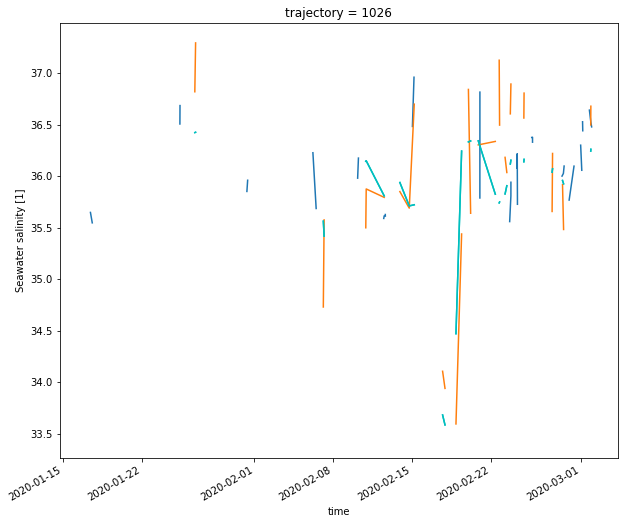

In [143]:
iusv=0
ds_saildrone_rss.smap_SSS[iusv,:].plot()
ds_saildrone_jpl.smap_SSS[iusv,:].plot()
ds_saildrone_jpl.SAL_CTD_MEAN[iusv,:].plot(c='c')
ds_saildrone_jpl.SAL_CTD_MEAN[iusv,:].plot(c='c')

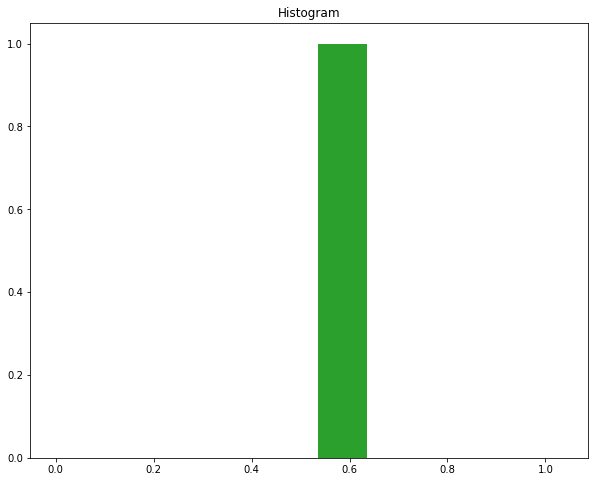

In [147]:
for iusv in range(3):
    (ds_saildrone.smap_SSS[iusv,:]-ds_saildrone.SAL_CTD_MEAN[iusv,:]).plot()

In [145]:
#only make comparison where all have data 
cond = (ds_saildrone_rss.smap_SSS>10) & (ds_saildrone_jpl.smap_SSS>10) & (ds_saildrone_rss.smap_SSS_40km>10)
rss = ds_saildrone_rss.where(cond)
jpl = ds_saildrone_jpl.where(cond)
ds_saildrone = rss
print('SMAP Salinity 40km')
print('    ',ds_saildrone.trajectory.data)
print('mean',(ds_saildrone.smap_SSS_40km-ds_saildrone.SAL_CTD_MEAN).mean('time').data)
print('std',(ds_saildrone.smap_SSS_40km-ds_saildrone.SAL_CTD_MEAN).std('time').data)
print('SMAP Salinity RSS')
print('    ',ds_saildrone.trajectory.data)
print('mean',(ds_saildrone.smap_SSS-ds_saildrone.SAL_CTD_MEAN).mean('time').data)
print('std',(ds_saildrone.smap_SSS-ds_saildrone.SAL_CTD_MEAN).std('time').data)
ds_saildrone = jpl
print('SMAP Salinity JPL')
print('    ',ds_saildrone.trajectory.data)
print('mean',(ds_saildrone.smap_SSS-ds_saildrone.SAL_CTD_MEAN).mean('time').data)
print('std',(ds_saildrone.smap_SSS-ds_saildrone.SAL_CTD_MEAN).std('time').data)
print('num obs',(ds_saildrone.smap_SSS/ds_saildrone.smap_SSS).sum('time').data)


SMAP Salinity 40km
     ['1026' '1060' '1061']
mean [       nan        nan 0.49045574]
std [nan nan  0.]
SMAP Salinity RSS
     ['1026' '1060' '1061']
mean [       nan        nan 0.36822139]
std [nan nan  0.]
SMAP Salinity JPL
     ['1026' '1060' '1061']
mean [      nan       nan 0.5354249]
std [nan nan  0.]
num obs [0. 0. 1.]


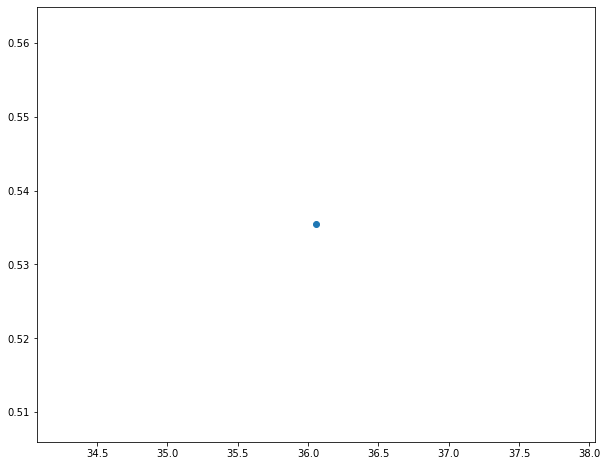

In [146]:
plt.scatter(ds_saildrone.SAL_CTD_MEAN,ds_saildrone.smap_SSS-ds_saildrone.SAL_CTD_MEAN)

2020-01-17T00:00:00.000000000 2020-03-02T23:59:00.000000000
2020-01-17T00:00:00.000000000 2020-03-02T23:59:00.000000000


std [0.66962124 0.67180961 0.68390791]


<xarray.Dataset>
Dimensions:                       (time: 66240, trajectory: 3)
Coordinates:
    lat                           (trajectory, time) float64 11.77 ... 9.193
    lon                           (trajectory, time) float64 -56.28 ... -52.02
  * time                          (time) datetime64[ns] 2020-01-17 ... 2020-0...
  * trajectory                    (trajectory) object '1026' '1060' '1061'
Data variables:
    SOG_MEAN                      (trajectory, time) float64 2.214 1.88 ... nan
    COG_MEAN                      (trajectory, time) float64 153.7 165.1 ... nan
    HDG_MEAN                      (trajectory, time) float64 152.0 151.7 ... nan
    ROLL_MEAN                     (trajectory, time) float64 11.9 -2.8 ... nan
    PITCH_MEAN                    (trajectory, time) float64 9.3 -1.0 ... nan
    UWND_MEAN                     (trajectory, time) float64 -8.51 -7.56 ... nan
    VWND_MEAN                     (trajectory, time) float64 -1.83 -2.5 ... nan
    WWND_MEAN                     (trajectory, time) float64 -0.1 -0.03 ... nan
    GUST_WND_MEAN                 (trajectory, time) float64 9.7 8.82 ... nan
    WIND_MEASUREMENT_HEIGHT_MEAN  (trajectory, time) float64 4.947 4.949 ... nan
    TEMP_AIR_MEAN                 (trajectory, time) float64 26.98 26.98 ... nan
    RH_MEAN                       (trajectory, time) float64 79.77 80.07 ... nan
    BARO_PRES_MEAN                (trajectory, time) float64 1.016e+03 ... nan
    PAR_AIR_MEAN                  (trajectory, time) float64 0.0 0.0 ... nan nan
    TEMP_CTD_MEAN                 (trajectory, time) float64 27.35 27.36 ... nan
    TEMP_CTD_STDDEV               (trajectory, time) float64 0.0032 ... nan
    SAL_CTD_MEAN                  (trajectory, time) float64 35.32 35.32 ... nan
    TEMP_RBR_MEAN                 (trajectory, time) float64 27.35 27.37 ... nan
    SAL_RBR_MEAN                  (trajectory, time) float64 35.27 35.27 ... nan
    CHLOR_WETLABS_MEAN            (trajectory, time) float64 0.14 0.13 ... nan
    CHLOR_MEAN                    (trajectory, time) float64 0.5298 ... nan
    TEMP_O2_RBR_MEAN              (trajectory, time) float64 1e+05 1e+05 ... nan
    CDOM_MEAN                     (trajectory, time) float64 1e+05 1e+05 ... nan
    deltaT                        (trajectory, time) float64 -604.5 ... nan
    smap_SSS                      (trajectory, time) float32 35.98 35.98 ... nan
    smap_SSS_40km                 (trajectory, time) float32 35.12 35.12 ... nan
    smap_fland                    (trajectory, time) float32 1.085e-08 ... nan
    smap_fice                     (trajectory, time) float32 0.0 0.0 ... nan nan
    smap_iqc_flag                 (trajectory, time) float64 8.192e+03 ... nan
    smap_name                     (trajectory, time) object 'F:/data/sat_data...
    smap_dist                     (trajectory, time) float64 0.1431 ... nan
    smap_ydim                     (trajectory, time) float32 407.0 407.0 ... nan
    smap_xdim                     (trajectory, time) float32 1.13e+03 ... nan
    smap_rev_number               (trajectory, time) float64 2.65e+04 ... nan
    dist_total                    (trajectory, time) float64 0.1095 ... nan
    dist_between                  (trajectory, time) float64 0.1095 ... nan
Attributes:
    title:                     ATOMIC-EUREC4A 2020 Surface Data - 1 min
    summary:                   This data set was collected by three saildrone...
    ncei_template_version:     NCEI_NetCDF_Trajectory_Template_v2.0
    Conventions:               CF-1.6, ACDD-1.3
    netcdf_version:            4.6.3
    featureType:               trajectory
    cdm_data_type:             Trajectory
    standard_name_vocabulary:  CF Standard Name Table v58
    description:               Saildrone NetCDF Format
    creator_name:              Saildrone
    platform:                  Saildrone
    institution:               Saildrone
    creator_email:             support@saildrone.com
    creator_url:           